# Buchberger algorithm for Gröbner basis - An analysis of it's implementations, complexity and applications

## Complexity of a Gröbner basis calculation using Buchberger algorithm

The estimation of computational complexity of the Buchberger algorithm is not a trivial task because the number of choices may drastically change which directly affects the computation time. These choices may depend on the number of variables and within a given number of variables on the ordering of the leading terms. Hence, we resort to finding an upper bound on the degree of the generated Gröbner Basis, $G$.

It has been <a id="ref-1" href="#cite-DUBE_1990">(Dubé,1990)</a> proved that the degree of all polynomials in $G$ of an input polynomial $B$ are bounded by doubly exponential in the number of variables but polynomial in terms of degree. , i.e.,

\begin{equation}
2{\bigg ( \frac{d^2}{2} + d \bigg)}^{2^{n-2}}
\end{equation}

where $d$ is the maximal total degree of the input polynomials and $n$ is the number of variables. This allows us to theoretically, use *linear algebra* over the *vector spaces* of the polynomials of degree bounded by this value, to obtain an algorithmic complexity, $d^{2^{n + o(1)}}$.

On the other hand it has been shown by <a id="ref-2" href="#cite-MAYR_1982">(Mayr and Meyer, 1982)</a> that some examples Gröbner Basis contain elements of the degree, 

$$ d^{2^{\Omega(n)}}$$ 

The above mentioned complexity is optimal, although quite rare. 

These estimates on the size of the output directly imply estimates on the memory requirements and the runtime of the Buchberger algorithm. Although they only describe the complexity of the problem rather than the complexity of a particular algorithm, in the sense that no other (hypothetical) algorithm for computing Gröbner bases can possibly be faster in the worst case.

Despite these unavoidable worst case behaviour, in most cases of practical relevance it is possible to obtain Gröbner bases in a reasonable time. The algorithm tends to perform far more efficiently on input coming from applications than in the worst case.

Since Buchberger algorithm was first introduced <a id="ref-3" href="#cite-BUCHBERGER_THESIS">(Buchberger, 1965)</a> it has been improved for better efficiency and the latest variants [Faugère's F4] and [Faugère's F5 Algorithms]  are currently the most efficient in calculating Gröbner Basis and allow to compute routinely Gröbner bases consisting of several hundreds of polynomials, having each several hundreds of terms and coefficients of several hundreds of digits. 

## Sensitivity of Buchberger algorithm

The Buchberger algorithm shows sensitivity to the following factors while generating a Gröbner Basis for a given polynomial:
* The number of variables,
* The degrees of the polynomial,
* Ordering of the input polynomial, and
* The size of the coefficients of the polynomial.

In this section, we will show programmatically the sensitivity of Buchberger algorithm to each of the abovesaid factors and see how the algorithm reacts to changes for each given factor.

### Sensitivity to number of variables
We will first take a test case of $3$ variable polynomials. Our input polynomial $F = [F_1,F_2, F_3]$ where,

\begin{equation}
F_1 = x^2 + y^2 + z^2 \\
 F_2 = 2x^2 - xy - z^2 \\
F_3 = y^3-z^3
\end{equation}

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x,y,z,a,b,c,p,q,r,t
import time

In [2]:
# F3 = x**3*y**3 - 3*x**2*y
# [x**3*z - 2*x*y*z**2, x**2*y*z**3 - 2*y**2*z + x, x**3*y**3*z**3 - 3*x**2*y*5*z]
# [x**3 - 2*x*y, x**2*y - 2*y**2 + x]
# [t**2+ x**2 + y**2+ z**2,t**2 + 2*x**2 - x*y - z**2, t + y**3 - z**3]
variables = [x,y,z,a,b,c,p,q,r,t]
times = []

F = [F1, F2, F3] = [x**2 + y**2+ z**2, 2*x**2 - x*y - z**2, y**3 - z**3]
# print(F1,F2)

tic = time.perf_counter()
result = sp.groebner(F,  order='grevlex', method = "f5b")
toc = time.perf_counter()
print(f"Finished calculating Gröbner Basis in: {toc-tic:0.6f} seconds")
print(result)
times.append(toc-tic)

Finished calculating Gröbner Basis in: 0.009019 seconds
GroebnerBasis([z**5, 31*y**2*z**2 + 23*z**4, 31*y*z**3 - 4*z**4, y**3 - z**3, 3*x*z**2 - 7*y*z**2 - 5*z**3, x**2 + y**2 + z**2, x*y + 2*y**2 + 3*z**2], x, y, z, domain='ZZ', order='grevlex')


As we can see in the above example, the algorithm was quite fast in computing the Gröbner basis. Now let's change the number of variables in the input polynomial. This time we change our input polynomials to,
$$ F_1 = t^2 + x^2 + y^2 + z^2 $$
$$ F_2 = t^2 + 2x^2 - xy - z^2 $$
$$ F_3 = t + y^3-z^3$$

In [3]:
F = [F1, F2, F3] = [t**2+ x**2 + y**2+ z**2,t**2 + 2*x**2 - x*y - z**2, t + y**3 - z**3]
tic = time.perf_counter()
result = sp.groebner(F,  order='grevlex', method = "f5b")
toc = time.perf_counter()
print(f"Finished calculating Gröbner Basis in: {toc-tic:0.6f} seconds")
times.append(toc-tic)

Finished calculating Gröbner Basis in: 0.017446 seconds


In [4]:
F = [F1, F2, F3] = [p**4*t**2+ x**2 + y**2+ z**2, p*t**2 + 2*x**2 - x*y - z**2, p**3 + t + y**3 - z**3]
tic = time.perf_counter()
result = sp.groebner(F, order='grevlex', method = "f5b")
toc = time.perf_counter()
print(f"Finished calculating Gröbner Basis in: {toc-tic:0.6f} seconds")
times.append(toc-tic)

Finished calculating Gröbner Basis in: 0.020741 seconds


([<matplotlib.axis.XTick at 0x7f10f77e57f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

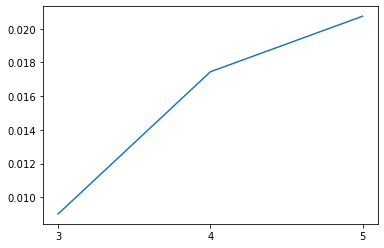

In [5]:
plt.plot(np.arange(3,6,1), times)
plt.xticks(np.arange(3,6,1))

As we see on adding another variable the difference between the two compute times is staggering. This is due to the fact that number of variables have a doubly exponential effect on the complexity. This effect can be mitigated using a suitable ordering of the polynomials but the result is not always substantial. It is widely accepted that *graded reverse lexographical ordering* is the most efficient for Gröbner Basis calculations <a id="ref-4" href="#cite-MACAULAY2">(Macaulay Software Docs)</a>.   

We will observe the effect of different ordering in a later section.

### Effect of degree of the polynomials
---
Using the same equation as eq.(1) we will increase the degree of the polynomial with each iteration and observe it's effect on the compute time of the Gröbner basis.

In [6]:
all_times = []
all_deg = []
times= []
N = range(0,30,1)
for n in N:
    F = [F1, F2, F3] = [x**n + y**n + z**n, 2*x**n - x*y - z**n, y**(n+1) - z**(n+1)]
    tic = time.perf_counter()
    result = sp.groebner(F, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    times.append(toc-tic)
all_times.append(times)
all_deg.append(N)

Text(0.5, 1.0, 'Time vs Degree of polynomials')

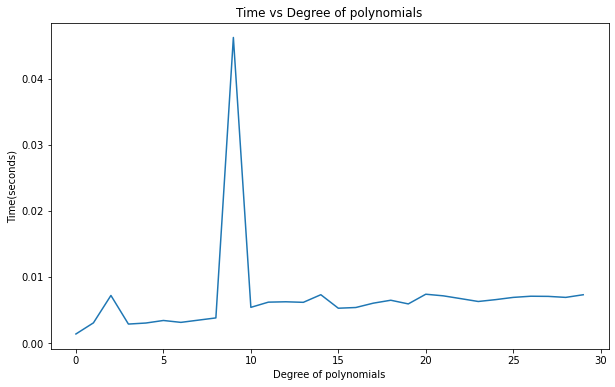

In [7]:
fig, ax = plt.subplots(ncols = 1, figsize = (10,6))
ax.plot(N, times)
ax.set_xlabel("Degree of polynomials")
ax.set_ylabel("Time(seconds)")
ax.set_title("Time vs Degree of polynomials")

As we can see from the plot, on increasing the degree of polynomials the time complexity doesn't vary initially but after a certain degree (the elbow on the above plot) it starts increasing exponentially. This elbow will of course be different for each polynomial input as we can observe from the plots below. The polynomial used in the code bloacks below are:

\begin{equation}
\alpha = [\alpha_1,\alpha_2] \\
\alpha_1 = y^n - 3xy^{n-1} + x^{n-2}y^{n-2} - 3x^{n-1}y + 5x^n + 3y^{n-1} + 2xy^{n-2} - 3x^{n-2}y - 4x^{n-1}, \forall \: n \in \mathbb{Z} \\ 
\alpha_2 = y^n + 2xy^{n-1} - 3x^{n-2}y^{n-2} + 4x^{n-1}y - 3x^n - 5y^{n-1} - 3xy^{n-2} + 5x{n-2}y - 5x^{n-1}, \forall \: n \in \mathbb{Z} \\
\end{equation}


\begin{equation}
\beta = [\beta_1, \beta_2] \\
\beta_1 = 2x^n + 3y^{n-1}x + 4z^{n+1} - 5, \forall \: n \in \mathbb{Z} \\
\beta_2 = 3x^{n-1}y^n + 4y^2x^{n-2} + 5z^{n} - 2, \forall \: n \in \mathbb{Z} \\
\end{equation}


\begin{equation}
\gamma = [\gamma_1, \gamma_2, \gamma_3] \\
\gamma_1 = (n+1)xyz + x + 1,\forall \: n \in \mathbb{Z} \\
\gamma_2 = xy^nz + 1,\forall \: n \in \mathbb{Z} \\
\gamma_3 = x^ny^n + z^n,\forall \: n \in \mathbb{Z} \\
\end{equation}


In [8]:
# A = y**4 - 3*x*y**3 +x**2*y**2 -3*x**3*y + 5*x**4 + 3*y**3 + 2*x*y**2 - 3*x**2*y - 4*x**3 
# B = y**4 + 2*x*y**3 - 3*x**2*y**2 + 4*x**3*y - 3*x**4 - 5*y**3 - 3*x*y**2 + 5*x**2*y - 5*x**3
# F_1 = [A,B]

time2 = []
N_1 = range(0,30,1)
for n in N_1:
    A = y**n - 3*x*y**(n-1) +x**(n-2)*y**(n-2) -3*x**(n-1)*y + 5*x**n + 3*y**(n-1) + 2*x*y**(n-2) - 3*x**(n-2)*y - 4*x**(n-1) 
    B = y**n + 2*x*y**(n-1) - 3*x**(n-2)*y**(n-2) + 4*x**(n-1)*y - 3*x**n - 5*y**(n-1) - 3*x*y**(n-2) + 5*x**(n-2)*y - 5*x**(n-1)
    F_1 = [A,B]
    tic = time.perf_counter()
    result = sp.groebner(F_1, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time2.append(toc-tic)
all_times.append(time2)
all_deg.append(N_1)

In [9]:
# A = 2*x**n + 3*y**(n-1)*x + 4*z**(n+1) - 5
# B = 3*x**(n-1)*y**n + 4*y**2*x**(n-2) + 5*z**(n) - 2
time3 = []
N_2 = range(0,30,1)
for n in N_2:
    A = 2*x**n + 3*y**(n-1)*x + 4*z**(n+1) - 5
    B = 3*x**(n-1)*y**n + 4*y**2*x**(n-2) + 5*z**(n) - 2
    F_2 = [A,B]
    tic = time.perf_counter()
    result = sp.groebner(F_2,  order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time3.append(toc-tic)
    
all_times.append(time3)
all_deg.append(N_2)

In [12]:
time4 = []
N_3 = range(0,7,1)
for n in N_3:
    A = x*(n+1)*y*z + x + 1
    B = x*y**n*z + 1
    C = x**n*y**n + z**n
    F_3 = [A,B,C]
    tic = time.perf_counter()
    result = sp.groebner(F_3,  order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time4.append(toc-tic)

all_times.append(time4)
all_deg.append(N_3)

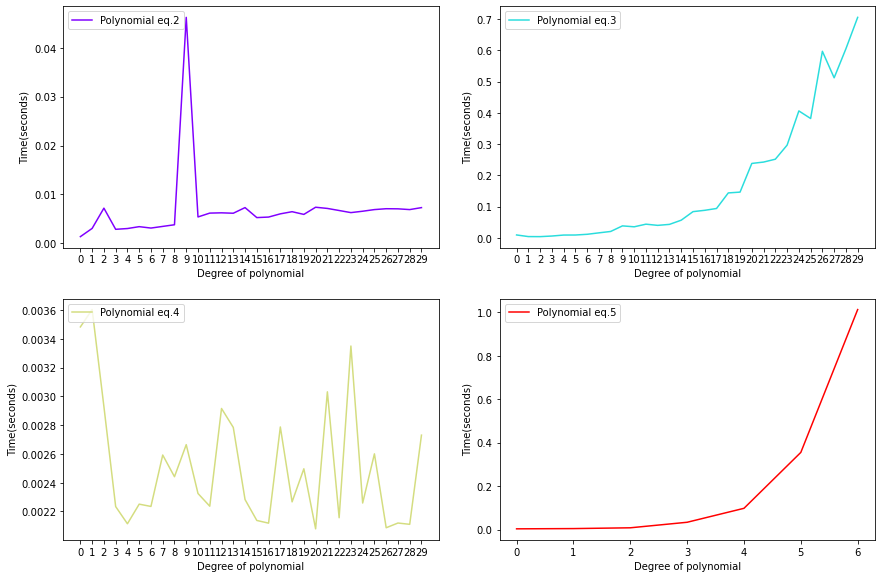

In [13]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,8))
fig.tight_layout(h_pad = 3,w_pad = 3)
color = iter(plt.cm.rainbow(np.linspace(0,1,len(all_deg))))

for i, (tm, rnge, ax) in enumerate(zip(all_times, all_deg, axs.flat)):
    c = next(color)
    ax.plot(rnge, tm, c=c, label = "Polynomial eq." + str(i+2))
    ax.set_ylabel("Time(seconds)")
    ax.set_xlabel("Degree of polynomial")
    ax.set_xticks(np.arange(0, max(rnge)+1, 1))
    ax.legend(loc = "upper left")

The sensitivity tends to change when we use floating point numbers as degrees of polynomials. This can be observed in the plots below. 

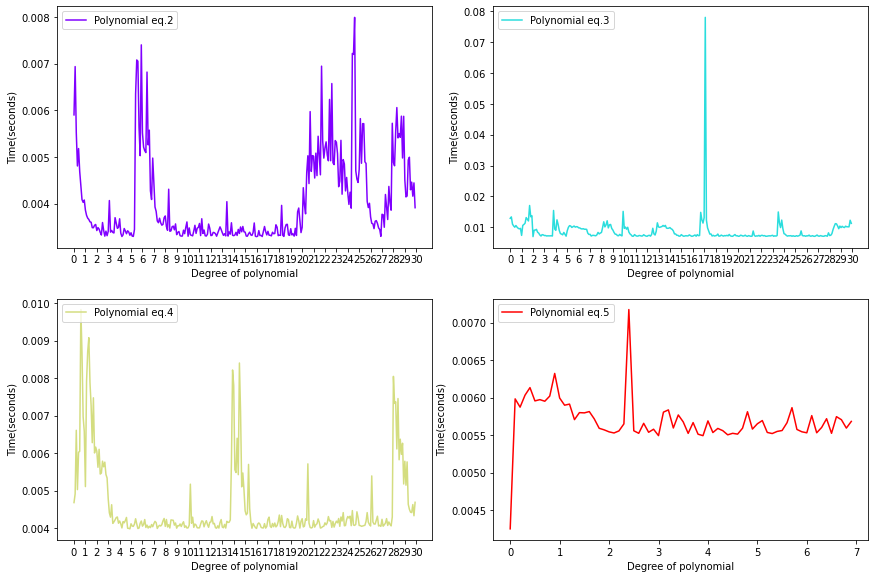

In [14]:
all_times = []
all_deg = []
times= []
N = np.arange(0,30,0.1)
for n in N:
    F = [F1, F2, F3] = [x**n + y**n + z**n, 2*x**n - x*y - z**n, y**(n+1) - z**(n+1)]
    tic = time.perf_counter()
    result = sp.groebner(F, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    times.append(toc-tic)
all_times.append(times)
all_deg.append(N)

time2 = []
N_1 = np.arange(0,30,0.1)
for n in N_1:
    A = y**n - 3*x*y**(n-1) +x**(n-2)*y**(n-2) -3*x**(n-1)*y + 5*x**n + 3*y**(n-1) + 2*x*y**(n-2) - 3*x**(n-2)*y - 4*x**(n-1) 
    B = y**n + 2*x*y**(n-1) - 3*x**(n-2)*y**(n-2) + 4*x**(n-1)*y - 3*x**n - 5*y**(n-1) - 3*x*y**(n-2) + 5*x**(n-2)*y - 5*x**(n-1)
    F_1 = [A,B]
    tic = time.perf_counter()
    result = sp.groebner(F_1, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time2.append(toc-tic)
all_times.append(time2)
all_deg.append(N_1)

time3 = []
N_2 = np.arange(0,30, 0.1)
for n in N_2:
    A = 2*x**n + 3*y**(n-1)*x + 4*z**(n+1) - 5
    B = 3*x**(n-1)*y**n + 4*y**2*x**(n-2) + 5*z**(n) - 2
    F_2 = [A,B]
    tic = time.perf_counter()
    result = sp.groebner(F_2,  order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time3.append(toc-tic)
    
all_times.append(time3)
all_deg.append(N_2)

time4 = []
N_3 = np.arange(0,7, 0.1)
for n in N_3:
    A = x*(n+1)*y*z + x + 1
    B = x*y**n*z + 1
    C = x**n*y**n + z**n
    F_3 = [A,B,C]
    tic = time.perf_counter()
    result = sp.groebner(F_3,  order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time4.append(toc-tic)

all_times.append(time4)
all_deg.append(N_3)

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,8))
fig.tight_layout(h_pad = 3,w_pad = 3)
color = iter(plt.cm.rainbow(np.linspace(0,1,len(all_deg))))

for i, (tm, rnge, ax) in enumerate(zip(all_times, all_deg, axs.flat)):
    c = next(color)
    ax.plot(rnge, tm, c=c, label = "Polynomial eq." + str(i+2))
    ax.set_ylabel("Time(seconds)")
    ax.set_xlabel("Degree of polynomial")
    ax.set_xticks(np.arange(0, max(rnge)+1, 1))
    ax.legend(loc = "upper left")

Now lets see the same equations being calculated but in step sizes of $0.0001$ in the range $[0,...,1] $.

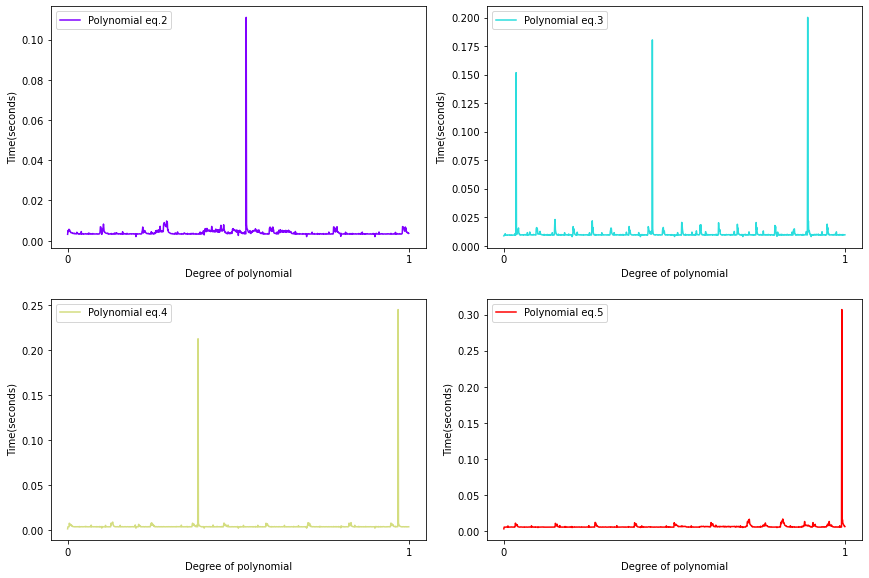

In [15]:
all_times = []
all_deg = []
times= []
N = np.arange(0,1,0.001)
for n in N:
    F = [F1, F2, F3] = [x**n + y**n + z**n, 2*x**n - x*y - z**n, y**(n+1) - z**(n+1)]
    tic = time.perf_counter()
    result = sp.groebner(F, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    times.append(toc-tic)
all_times.append(times)
all_deg.append(N)

time2 = []
N_1 = np.arange(0,1,0.001)
for n in N_1:
    A = y**n - 3*x*y**(n-1) +x**(n-2)*y**(n-2) -3*x**(n-1)*y + 5*x**n + 3*y**(n-1) + 2*x*y**(n-2) - 3*x**(n-2)*y - 4*x**(n-1) 
    B = y**n + 2*x*y**(n-1) - 3*x**(n-2)*y**(n-2) + 4*x**(n-1)*y - 3*x**n - 5*y**(n-1) - 3*x*y**(n-2) + 5*x**(n-2)*y - 5*x**(n-1)
    F_1 = [A,B]
    tic = time.perf_counter()
    result = sp.groebner(F_1, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time2.append(toc-tic)
all_times.append(time2)
all_deg.append(N_1)

time3 = []
N_2 = np.arange(0,1, 0.001)
for n in N_2:
    A = 2*x**n + 3*y**(n-1)*x + 4*z**(n+1) - 5
    B = 3*x**(n-1)*y**n + 4*y**2*x**(n-2) + 5*z**(n) - 2
    F_2 = [A,B]
    tic = time.perf_counter()
    result = sp.groebner(F_2, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time3.append(toc-tic)
    
all_times.append(time3)
all_deg.append(N_2)

time4 = []
N_3 = np.arange(0,1, 0.001)
for n in N_3:
    A = x*(n+1)*y*z + x + 1
    B = x*y**n*z + 1
    C = x**n*y**n + z**n
    F_3 = [A,B,C]
    tic = time.perf_counter()
    result = sp.groebner(F_3, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    time4.append(toc-tic)

all_times.append(time4)
all_deg.append(N_3)

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,8))
fig.tight_layout(h_pad = 3,w_pad = 3)
color = iter(plt.cm.rainbow(np.linspace(0,1,len(all_deg))))

for i, (tm, rnge, ax) in enumerate(zip(all_times, all_deg, axs.flat)):
    c = next(color)
    ax.plot(rnge, tm, c=c, label = "Polynomial eq." + str(i+2))
    ax.set_ylabel("Time(seconds)")
    ax.set_xlabel("Degree of polynomial")
    ax.set_xticks(np.arange(0, max(rnge)+1, 1))
    ax.legend(loc = "upper left")

### Sensitivity to the ordering of monomials
The monomial order for the input polynomials has a profound effect on the time and computation complexity of a Gröbner basis. Let's first understand the different monomial orderings. There are three widely accepted monomial ordering systems which are extensively used in the computational algebra. For understanding them we will consider a polynomial $X$, consisting of $n$ number of variables such that $X = \{x_1,x_2, \cdots,x_n\}$ with power of each variables belonging to the ring of integers, $\mathbb{Z}$. 

* **Lexicographical Ordering:**  Lexicographic order (lex) first compares exponents of x1 in the monomials, and in case of equality compares exponents of x2, and so forth.

* **Graded Lexicographical Ordering:** Graded lexicographic order (grlex, or deglex for degree lexicographic order) first compares the total degree (sum of all exponents), and in case of a tie applies lexicographic order.

* **Graded Reverse Lexicographical Ordering:** Graded reverse lexicographic order (grevlex, or degrevlex for degree reverse lexicographic order) compares the total degree first, then uses a reverse lexicographic order as tie-breaker, but it reverses the outcome of the lexicographic comparison so that lexicographically larger monomials of the same degree are considered to be degrevlex smaller.
A concrete recipe for the graded reverse lexicographic order is thus to compare by the total degree first, then compare exponents of the last indeterminate xn but reversing the outcome (so the monomial with smaller exponent is larger in the ordering), followed (as always only in case of a tie) by a similar comparison of xn−1, and so forth ending with x1. 

Now, we will observe the effect of these different ordering on the Gröbner basis solution for the eq(1). As the solution time for lower degrees is too small for significant comparison, we will vary the degrees just like the previous section and observe the difference in times.  

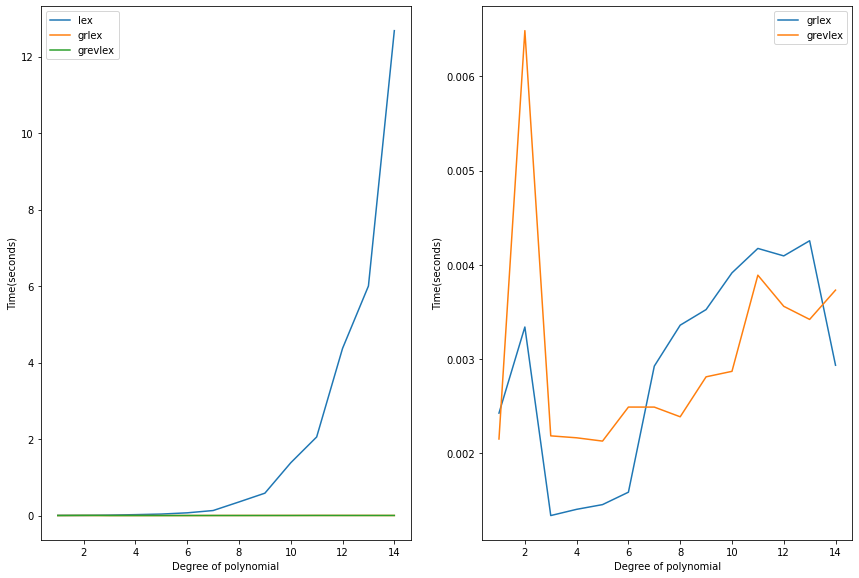

In [16]:
ordering_times = []
ordering_names = ['lex', 'grlex','grevlex']
N = np.arange(1,15,1)
for ordr in ordering_names:
    time_res= []
    for n in N:
        F = [F1, F2, F3] = [x**n + y**n + z**n, 2*x**n - x*y - z**n, y**(n+1) - z**(n+1)]
        tic = time.perf_counter()
        result = sp.groebner(F, order=ordr, method = "f5b")
        toc = time.perf_counter()
        time_res.append(toc-tic)
    ordering_times.append(time_res)

fig, ax = plt.subplots(1,2, figsize = (12,8))
fig.tight_layout(h_pad = 2, w_pad = 4)
for tm, ordr in zip(ordering_times, ordering_names):
    ax[0].plot(N, tm, label = ordr)
    ax[0].set_xlabel("Degree of polynomial")
    ax[0].set_ylabel("Time(seconds)")
    ax[0].legend(loc = "upper left")

# To observe the difference in grlex and grevlex we need a more detailed plot
for tm, ordr in zip(ordering_times[1:], ordering_names[1:]):
    ax[1].plot(N, tm, label = ordr)
    ax[1].legend(loc = "best")
    ax[1].set_xlabel("Degree of polynomial")
    ax[1].set_ylabel("Time(seconds)")

As we can observe from the graphs above that the monomial ordering has a very significant effect on the computation time of a Gröbner basis. Although, in the above graph it seems like *'grlex'* is the optimal solution, we will take another example to confirm these results, i.e., we will use eq.(2) but this time increase the number of variables to 4. Also we will use hypothesis testing using confidence intervals as the results are quite small and close to each other and the observed difference in the computation time could possibly be some other back end system.

$H_0$ : *grevlex* is a better monomial ordering than *grlex* and results in faster computation times. 

$H_1$ : *grlex* is is a better monomial ordering than *grevlex* and results in faster computation times.

t-value = 1.9961040140700053, p-value = 0.07703442103792402


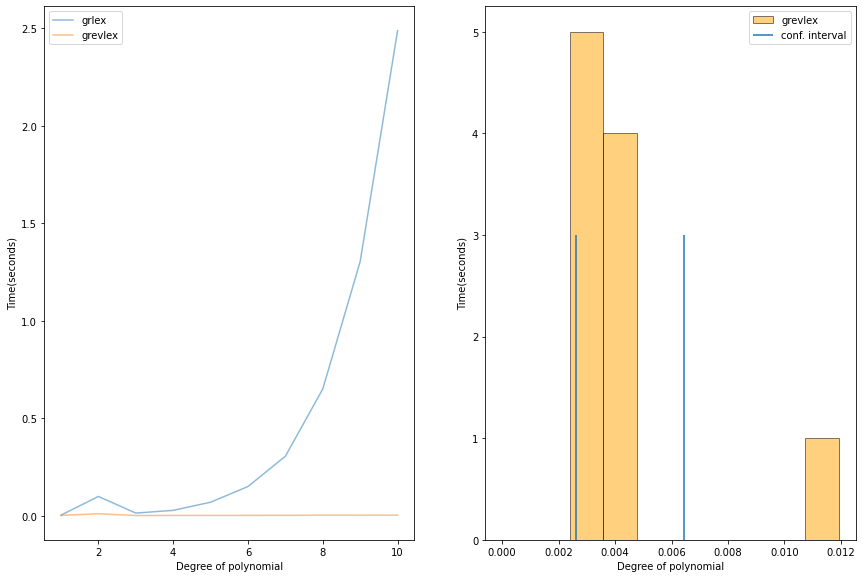

In [17]:
ordering_times2 = []
ordering_names = ['grlex','grevlex']
N = np.arange(1,11,1)
for ordr in ordering_names:
    time_res= []
    for n in N:
        F = [F1, F2, F3] = [t**n+ x**n + y**n+ z**n,t**n + 2*x**n - x*y - z**n, t + y**(n+1) - z**(n+1)]
        tic = time.perf_counter()
        result = sp.groebner(F, order=ordr, method = "f5b")
        toc = time.perf_counter()
        time_res.append(toc-tic)
    ordering_times2.append(time_res)

from scipy import stats
t_stat, p_val = stats.ttest_ind(ordering_times2[0], ordering_times2[1], equal_var = False)
  
print(f"t-value = {t_stat}, p-value = {p_val}")
conf_int = stats.t.interval(alpha=0.95, df=len(ordering_times2[-1])-1, loc=np.mean(ordering_times2[-1]), 
                            scale=stats.sem(ordering_times2[-1]))

fig, ax = plt.subplots(1,2, figsize = (12,8))
fig.tight_layout(h_pad = 2, w_pad = 4)
for tm, ordr in zip(ordering_times2, ordering_names):
    ax[0].plot(N, tm, label = ordr, alpha = 0.5)
    ax[0].set_xlabel("Degree of polynomial")
    ax[0].set_ylabel("Time(seconds)")
    ax[0].legend(loc = "upper left")

# To observe the difference in grlex and grevlex we need a more detailed plot
for tm, ordr in zip(ordering_times2[1:], ordering_names[1:]):
    ax[1].hist(tm, 10, label = ordr, alpha = 0.5, color= "orange", range = (0, max(tm)), edgecolor = "black",
              linewidth = 1.0)
    ax[1].vlines(conf_int[0], ymin = 0, ymax = 3, label = "conf. interval")
    ax[1].vlines(conf_int[1], ymin = 0, ymax = 3)
    ax[1].legend(loc = "best")
    ax[1].set_xlabel("Degree of polynomial")
    ax[1].set_ylabel("Time(seconds)")

From the above t-test on the difference in mean, we can see that the p-value $\leq 0.05$, hence we don't have enough evidence to reject the null hypothesis.

So, we can conclude that *grevlex* is a better monomial ordering than *grlex* and results in faster computation times. 

### Sensitivity to the size of the coefficients

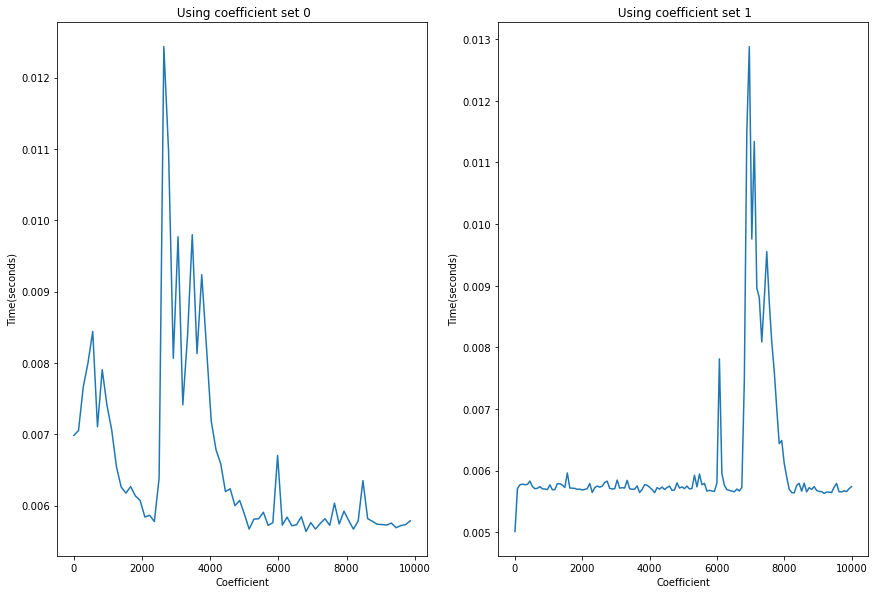

In [18]:
coef_size = np.arange(1,10000, np.random.choice(np.arange(200)))
coef_time = []
temp = []
for n in coef_size:
    F = [F1, F2, F3] = [n*x**2 + y**2+ z**2, (n+2)*x**2 - x*y - z**2, n*y**3 - n*z**3]
    tic = time.perf_counter()
    result = sp.groebner(F,  order='grevlex', method = "f5b")
    toc = time.perf_counter()
    temp.append(toc-tic)

coef_time.append(temp)

# A different coefficient set on the same polynomial
coef_size2 = np.arange(1,10000, np.random.choice(np.arange(200)))
temp = []
for n in coef_size2:
    F = [F1, F2, F3] = [n*x**2 + y**2+ z**2, (n+2)*x**2 - x*y - z**2, n*y**3 - n*z**3]
    tic = time.perf_counter()
    result = sp.groebner(F, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    temp.append(toc-tic)

coef_time.append(temp)

sizes = [coef_size, coef_size2]
fig, ax = plt.subplots(1,2, figsize = (12,8))
fig.tight_layout(h_pad = 3, w_pad = 4)
for i, (sz, tm) in enumerate(zip(sizes, coef_time)):
    ax[i].plot(sz, tm)
    ax[i].set_ylabel("Time(seconds)")
    ax[i].set_xlabel("Coefficient")
    ax[i].set_title(f" Using coefficient set {i}")

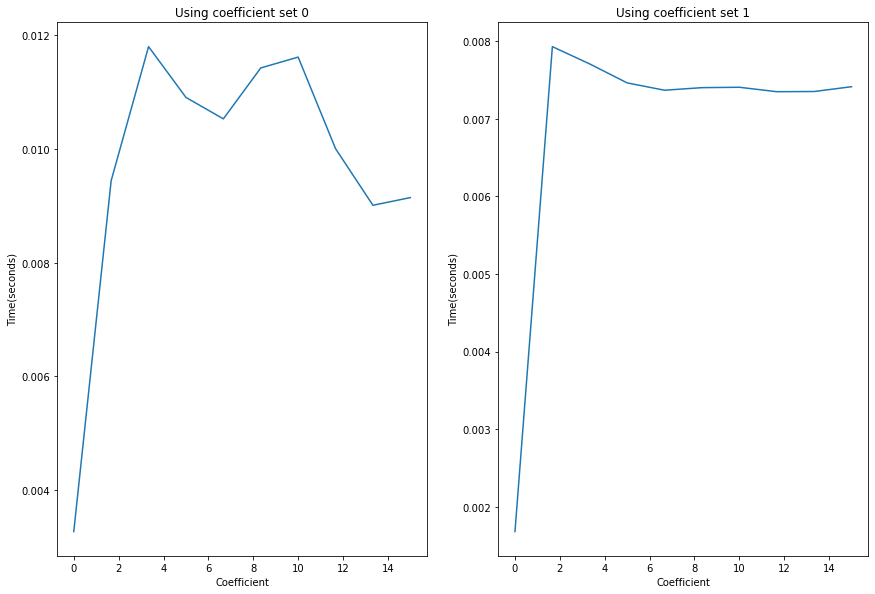

In [19]:
coef_size = np.linspace(0,15,10)
coef_time = []
temp = []
for n in coef_size:
    F = [F1, F2, F3] = [n*x**2 + y**2+ z**2, (n+2)*x**2 - x*y - z**2, n*y**3 - n*z**3]
    tic = time.perf_counter()
    result = sp.groebner(F, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    temp.append(toc-tic)

coef_time.append(temp)

# A different coefficient set on the same polynomial
coef_size2 = np.linspace(0,15,10)
temp = []
for n in coef_size2:
    F = [F1, F2, F3] = [n*x**2 + y**2+ z**2, (n+2)*x**2 - x*y - z**2, n*y**3 - n*z**3]
    tic = time.perf_counter()
    result = sp.groebner(F, order='grevlex', method = "f5b")
    toc = time.perf_counter()
    temp.append(toc-tic)

coef_time.append(temp)

sizes = [coef_size, coef_size2]
fig, ax = plt.subplots(1,2, figsize = (12,8))
fig.tight_layout(h_pad = 3, w_pad = 4)
for i, (sz, tm) in enumerate(zip(sizes, coef_time)):
    ax[i].plot(sz, tm)
    ax[i].set_ylabel("Time(seconds)")
    ax[i].set_xlabel("Coefficient")
    ax[i].set_title(f"Using coefficient set {i}")

In the above code, we used the same input polynomial with same degrees for both graphs with variations only in the coefficients. The effect of the changing coefficients is quite random and hard to predict. In the above code, for each different value of step size we get a different graph.

Although, from the second example we can see that on using floating point coefficients the computation time increases considerably. Note that the floating point numbers used are comparitively very small as opposed to the integers we used.

## Faugère F4 and F5 algorithm
---
Faugère F4 algorithm was introduced by Faugère in his 1999 paper <a id="ref-5" href="#cite-FAUGERE1999">(Faugère, 1990)</a> as an improvement over the Buchberger algorithms. The F4 algorithm *reduces* several polynomials by a list of polynomials *simultaneously* by leveraging linear algebra techniques. The paper also talks about *pre-processing* for the matrix, $M$

The state-of-art implementation for Gröbner basis calculation is the Faugère F5 algorithm <a id="ref-6" href="#cite-FAUGERE2002">(Faugère, 2002)</a>. The algorithm has the same structure as Buchberger algorithm, however it utilizes a very powerful criteria for elimination of useless critical pairs, significantly reducing the number of required polynomial divisions. 

The F5 algorithm differs from Buchberger algorithm in the following ways:
- F5 algorithm doesn't use Buchberger criteria. 
- Computes Gröbner basis incrementally, i.e., for $F = \{f_1, f_2, f_3\}$ it will compute the basis as $\{f_1\}, \{f_1, f_2\}, \{f_1, f_2, f_3\}$.
- It only accounts for trivial **syzygies** ,i.e., $f_if_j - f_jf_i = 0$.
- No reductions to zero are guaranteed if the input is a regular sequence. 

## Applications

The Gröbner basis can be used for the following applications:
* Solving systems of polynomials
* Graph coloring
* Integer Optimizations

The below applications are all explained in detail in the book <a id="ref-7" href="#cite-buchberger_winkler_1998">(Buchberger, 1998)</a>.
* Numerical Analysis
* Coding Theory
* Partial differential Equations
* Symmetric groups

## Future Research
Faugère's F4 and F5 algorithms target two different limitations of the Buchberger's algorithm. Future research can focus on bringing the two algorithms together for hypothetically speaking a better computation time and less resource intensive nature.

The current class of algorithms give us precise calculations of the Gröbner basis, a future researcher might be able to look into the possiblity of using approximations in the intermediate steps to achieve the results faster.

# References

<a id="cite-DUBE_1990"/><sup><a href=#ref-1>[^]</a></sup>Dubé, Thomas W.. 1990. _The Structure of Polynomial Ideals and Gröbner Bases_. [URL](https://doi.org/10.1137/0219053)

<a id="cite-MAYR_1982"/><sup><a href=#ref-2>[^]</a></sup>Ernst W Mayr and Albert R Meyer. 1982. _The complexity of the word problems for commutative semigroups and polynomial ideals_. [URL](https://www.sciencedirect.com/science/article/pii/0001870882900482)

<a id="cite-BUCHBERGER_THESIS"/><sup><a href=#ref-3>[^]</a></sup>Bruno Buchberger. 2006. _Bruno Buchberger’s PhD thesis 1965: An algorithm for finding the basis elements of the residue class ring of a zero dimensional polynomial ideal_. [URL](https://www.sciencedirect.com/science/article/pii/S0747717105001483)

<a id="cite-MACAULAY2"/><sup><a href=#ref-4>[^]</a></sup>Grayson, Daniel R. and Stillman, Michael E.. undefined. _Macaulay2, a software system for research in algebraic geometry_.

<a id="cite-FAUGERE1999"/><sup><a href=#ref-5>[^]</a></sup>Jean-Charles Faugére. 1999. _A new efficient algorithm for computing Gröbner bases (F4)_. [URL](https://www.sciencedirect.com/science/article/pii/S0022404999000055)

<a id="cite-FAUGERE2002"/><sup><a href=#ref-6>[^]</a></sup>Faugère, Jean Charles. 2002. _A New Efficient Algorithm for Computing GröBner Bases without Reduction to Zero (F5)_. [URL](https://doi.org/10.1145/780506.780516)

<a id="cite-buchberger_winkler_1998"/><sup><a href=#ref-7>[^]</a></sup>Buchberger, Bruno and Winkler, Franz. 1998. _Gröbner Bases and Applications_. [URL](https://www.cambridge.org/core/books/grobner-bases-and-applications/7BCC8A6A20E365A63402DA508C9BA6F2)



---

<!--bibtex

@article{DUBE_1990,
author = {Dubé, Thomas W.},
title = {The Structure of Polynomial Ideals and Gröbner Bases},
journal = {SIAM Journal on Computing},
volume = {19},
number = {4},
pages = {750-773},
year = {1990},
doi = {10.1137/0219053},

URL = "https://doi.org/10.1137/0219053",
eprint = { 
        https://doi.org/10.1137/0219053
    
}

}

@article{MAYR_1982,
title = {The complexity of the word problems for commutative semigroups and polynomial ideals},
journal = {Advances in Mathematics},
volume = {46},
number = {3},
pages = {305-329},
year = {1982},
issn = {0001-8708},
doi = {https://doi.org/10.1016/0001-8708(82)90048-2},
url = {https://www.sciencedirect.com/science/article/pii/0001870882900482},
author = {Ernst W Mayr and Albert R Meyer},
abstract = {Any decision procedure for the word problems for commutative semigroups and polynomial deals inherently requires computational storage space growing exponentially with the size of the problem instance to which the procedure is applied. This bound is achieved by a simple procedure for the semigroup problem.}
}

@article{BUCHBERGER_THESIS,
title = {Bruno Buchberger’s PhD thesis 1965: An algorithm for finding the basis elements of the residue class ring of a zero dimensional polynomial ideal},
journal = {Journal of Symbolic Computation},
volume = {41},
number = {3},
pages = {475-511},
year = {2006},
note = {Logic, Mathematics and Computer Science: Interactions in honor of Bruno Buchberger (60th birthday)},
issn = {0747-7171},
doi = {https://doi.org/10.1016/j.jsc.2005.09.007},
url = {https://www.sciencedirect.com/science/article/pii/S0747717105001483},
author = {Bruno Buchberger},
abstract = {This is the English translation (by Michael P. Abramson) of the PhD thesis of Bruno Buchberger, in which he introduced the algorithmic theory of Gröbner bases. Some comments by Buchberger on the translation and the thesis are given in an additional short paper in this issue of the Journal of Symbolic Computation.}
}

@Misc{MACAULAY2,
author = {Grayson, Daniel R. and Stillman, Michael E.},
title = {Macaulay2, a software system for research in algebraic geometry},
howpublished = {Available at \url{https://math.uiuc.edu/Macaulay2/}}
}

@article{FAUGERE1999,
title = {A new efficient algorithm for computing Gröbner bases (F4)},
journal = {Journal of Pure and Applied Algebra},
volume = {139},
number = {1},
pages = {61-88},
year = {1999},
issn = {0022-4049},
doi = {https://doi.org/10.1016/S0022-4049(99)00005-5},
url = {https://www.sciencedirect.com/science/article/pii/S0022404999000055},
author = {Jean-Charles Faugére},
abstract = {This paper introduces a new efficient algorithm for computing Gröbner bases. To avoid as much intermediate computation as possible, the algorithm computes successive truncated Gröbner bases and it replaces the classical polynomial reduction found in the Buchberger algorithm by the simultaneous reduction of several polynomials. This powerful reduction mechanism is achieved by means of a symbolic precomputation and by extensive use of sparse linear algebra methods. Current techniques in linear algebra used in Computer Algebra are reviewed together with other methods coming from the numerical field. Some previously untractable problems (Cyclic 9) are presented as well as an empirical comparison of a first implementation of this algorithm with other well known programs. This comparison pays careful attention to methodology issues. All the benchmarks and CPU times used in this paper are frequently updated and available on a Web page. Even though the new algorithm does not improve the worst case complexity it is several times faster than previous implementations both for integers and modulo p computations.}
}

@inproceedings{FAUGERE2002,
author = {Faugère, Jean Charles},
title = {A New Efficient Algorithm for Computing GröBner Bases without Reduction to Zero (F5)},
year = {2002},
isbn = {1581134843},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/780506.780516},
doi = {10.1145/780506.780516},
abstract = {This paper introduces a new efficient algorithm for computing Gr\"{o}bner bases. We replace the Buchberger criteria by an optimal criteria. We give a proof that the resulting algorithm (called F5) generates no useless critical pairs if the input is a regular sequence. This a new result by itself but a first implementation of the algorithm F5 shows that it is also very efficient in practice: for instance previously untractable problems can be solved (cyclic 10). In practice for most examples there is no reduction to zero. We illustrate this algorithm by one detailed example.},
booktitle = {Proceedings of the 2002 International Symposium on Symbolic and Algebraic Computation},
pages = {75–83},
numpages = {9},
location = {Lille, France},
series = {ISSAC '02}
}

@book{buchberger_winkler_1998, 
place={Cambridge}, 
series={London Mathematical Society Lecture Note Series}, 
title={Gröbner Bases and Applications}, 
author = {Buchberger, Bruno and Winkler, Franz},
URL = {https://www.cambridge.org/core/books/grobner-bases-and-applications/7BCC8A6A20E365A63402DA508C9BA6F2},
DOI={https://doi.org/10.1017/CBO9780511565847}, 
publisher={Cambridge University Press}, 
year={1998}, 
collection={London Mathematical Society Lecture Note Series}
}
-->

---